## Keras deep neural network

The structure of the network is the following:

    INPUT -> FC -> ReLU -> FC -> ReLU -> FC -> OUTPUT -> SOFTMAX LOSS.  

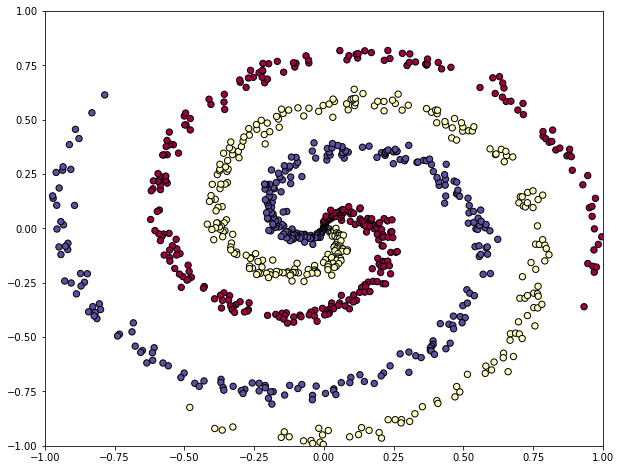

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Data generation obtained from http://cs231n.github.io/neural-networks-case-study/
def generate_data(N, K):
    D = 2   # Dimensionality
    X = np.zeros((N * K, D))            # Data matrix (each row = single example)
    y = np.zeros(N * K, dtype='uint8')  # Class labels
    for j in xrange(K):
        ix = range(N * j, N * (j + 1))
        r = np.linspace(0.0, 1, N)                                         # radius
        t = np.linspace(j * 8, (j + 1) * 8, N) + np.random.randn(N) * 0.2  # theta
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = j
    
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolor='black')  # Visualize
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    return X, y

# Example:
generate_data(300, 3);

### Training

Using TensorFlow backend.


Step    0. Loss=1.432, train accuracy=0.31468
Step  500. Loss=0.802, train accuracy=0.92537
Step 1000. Loss=0.782, train accuracy=0.92537
Step 1500. Loss=0.776, train accuracy=0.92413
Step 2000. Loss=0.774, train accuracy=0.92662
Step 2500. Loss=0.773, train accuracy=0.92786
Step 3000. Loss=0.773, train accuracy=0.92662


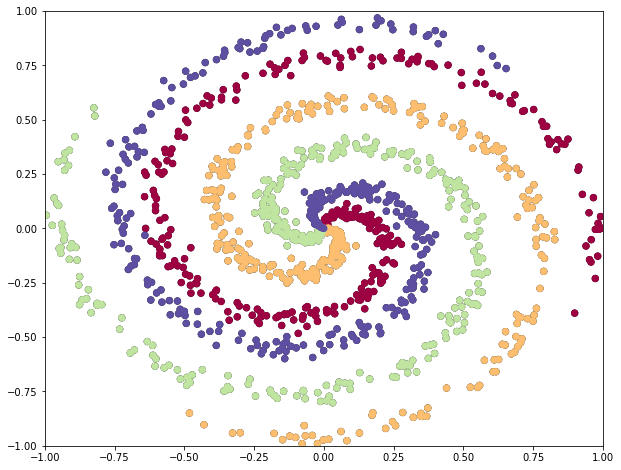

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical
from keras import regularizers
from keras import optimizers

reg = 0.002
step_size = 0.01
data_per_class = 300  # Number of points per class
num_classes = 4       # Number of classes

X, y = generate_data(data_per_class, num_classes)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)  # Visualize
y_cat = to_categorical(y, num_classes)
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.33)

model = Sequential()
model.add(Dense(units=20, input_dim=2, kernel_regularizer=regularizers.l2(reg)))
model.add(Activation('relu'))
model.add(Dense(units=10, input_dim=2, kernel_regularizer=regularizers.l2(reg)))
model.add(Activation('relu'))
model.add(Dense(units=num_classes, kernel_regularizer=regularizers.l2(reg)))
model.add(Activation('softmax'))

opt = optimizers.Adam(lr=step_size)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# model.fit(X_train, y_train, epochs=5000, batch_size=X_train.shape[0], verbose=0)
for i in xrange(3001):
    model.train_on_batch(X_train, y_train)
    if i % 500 == 0:
        print "Step %4d. Loss=%.3f, train accuracy=%.5f" % tuple([i] + model.test_on_batch(X_train, y_train))

### Visualization

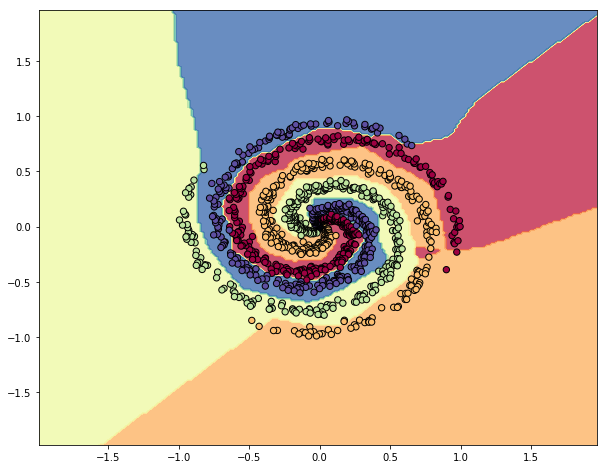

In [3]:
# Plot the resulting classifier on the test data.
h = 0.02
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.argmax(model.predict(np.c_[xx.ravel(), yy.ravel()]), axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolor='black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max());

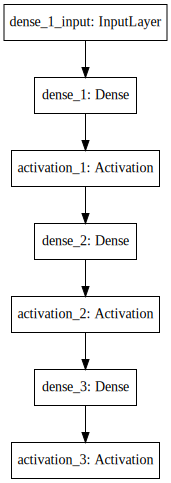

In [4]:
from IPython.display import SVG
# https://github.com/Theano/Theano/issues/1801#issuecomment-267989843
# sudo pip install pydot
# sudo apt-get install graphviz
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))